In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pylab import *

In [2]:
# Convert data to dataframe
lung_df = pd.read_csv(os.path.join("Resources", "CDC_Cancer.csv"))
lung_df.head()

,Notes,State,State Code,Year,Year Code,Sex,Sex Code,Race,Race Code,Age Group,Age Group Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,NaN,Alabama,1.0,2007.0,2007.0,Female,F,Black or African American,2054-5,50-54 years,50-54,22.0,46035.0,47.8,29.9,72.4,10.2
1,NaN,Alabama,1.0,2007.0,2007.0,Female,F,Black or African American,2054-5,55-59 years,55-59,18.0,37490.0,48.0,28.5,75.9,11.3
2,NaN,Alabama,1.0,2007.0,2007.0,Female,F,Black or African American,2054-5,60-64 years,60-64,30.0,25229.0,118.9,80.2,169.8,21.7
3,NaN,Alabama,1.0,2007.0,2007.0,Female,F,Black or African American,2054-5,65-69 years,65-69,24.0,19762.0,121.4,77.8,180.7,24.8
4,NaN,Alabama,1.0,2007.0,2007.0,Female,F,Black or African American,2054-5,70-74 years,70-74,27.0,16750.0,161.2,106.2,234.5,31.0


In [3]:
# Get rid of unnecessary columns
lung_df_01 = lung_df.drop(["Notes", "State Code", "Year Code", "Sex Code", "Race Code", "Age Group"], axis=1)

#Change column names
lung_df_01 = lung_df_01.rename(columns = {"Age Group Code":"Age Group"})

# find null values in our dataframe
lung_df_01.isnull().sum()

#dropped all the rows containing null values from the dataframe
lung_df_01=lung_df_01.dropna(subset=['State', 'Year','Sex','Race','Age Group','Deaths','Population','Crude Rate'])
lung_df_01 = lung_df_01.astype({"Year": int, "Deaths": int, "Population": int})

print(lung_df_01.info())
lung_df_01.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10607 entries, 0 to 10606
Data columns (total 11 columns):
State                                       10607 non-null object
Year                                        10607 non-null int32
Sex                                         10607 non-null object
Race                                        10607 non-null object
Age Group                                   10607 non-null object
Deaths                                      10607 non-null int32
Population                                  10607 non-null int32
Crude Rate                                  10607 non-null float64
Crude Rate Lower 95% Confidence Interval    10607 non-null float64
Crude Rate Upper 95% Confidence Interval    10607 non-null float64
Crude Rate Standard Error                   10607 non-null float64
dtypes: float64(4), int32(3), object(4)
memory usage: 870.1+ KB
None


,State,Year,Sex,Race,Age Group,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Crude Rate Standard Error
0,Alabama,2007,Female,Black or African American,50-54,22,46035,47.8,29.9,72.4,10.2
1,Alabama,2007,Female,Black or African American,55-59,18,37490,48.0,28.5,75.9,11.3
2,Alabama,2007,Female,Black or African American,60-64,30,25229,118.9,80.2,169.8,21.7
3,Alabama,2007,Female,Black or African American,65-69,24,19762,121.4,77.8,180.7,24.8
4,Alabama,2007,Female,Black or African American,70-74,27,16750,161.2,106.2,234.5,31.0


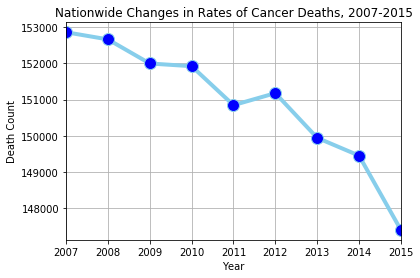

In [4]:
# Line graph- trend line of lung cancer mortality on a national level/nationwide over time from 2007-2015.

Group_By_Year_df = lung_df_01.groupby('Year')['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=12
                                                                   ,color='skyblue'
                                                                   ,linewidth=4)
plt.xlabel('Year')
plt.ylabel('Death Count')
plt.title('Nationwide Changes in Rates of Cancer Deaths, 2007-2015')
plt.grid(True)
plt.show()


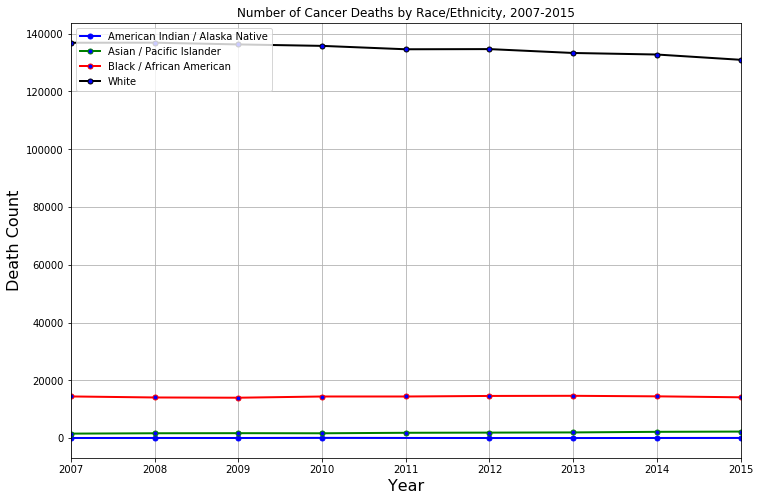

In [5]:
#Group data by Race
GroupBy_by_Race_df = lung_df_01.groupby('Race')

#Extract data into four seprate DataFrames based on race 
American_Indian_df = GroupBy_by_Race_df.get_group('American Indian or Alaska Native')
Asian_df = GroupBy_by_Race_df.get_group('Asian or Pacific Islander')                                              
African_American_df = GroupBy_by_Race_df.get_group('Black or African American')
White_df = GroupBy_by_Race_df.get_group('White')

plt.figure(figsize =(12,8))
American_Indian_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 


Asian_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2)
African_American_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='red'
                                                                   ,linewidth=2)

White_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='black'
                                                                   ,linewidth=2)

plt.xlabel('Year',fontsize = 16)
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Race/Ethnicity, 2007-2015')
plt.grid(True)

plt.legend(('American Indian / Alaska Native', 'Asian / Pacific Islander', 'Black / African American','White'),
           loc='upper left')
plt.show()


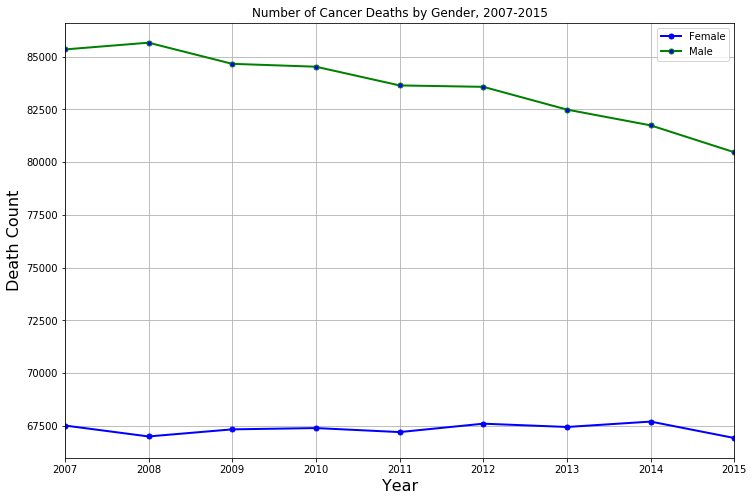

In [88]:
GroupBy_by_Gender_df = lung_df_01.groupby('Sex')

GroupBy_by_Female_df = GroupBy_by_Gender_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Gender_df.get_group('Male')  

plt.figure(figsize =(12,8))
GroupBy_by_Female_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='blue'
                                                                   ,linewidth=2) 

GroupBy_by_Male_df.groupby(['Year'])['Deaths'].sum().plot(x='year',y='Deaths'
                                                                   ,marker='o'                                                     
                                                                   ,markerfacecolor='blue'
                                                                   ,markersize=5
                                                                   ,color='green'
                                                                   ,linewidth=2) 
plt.xlabel('Year',fontsize = 16)
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Gender, 2007-2015')
plt.grid(True)

plt.legend(('Female','Male'), 
           loc='upper right')
plt.show()



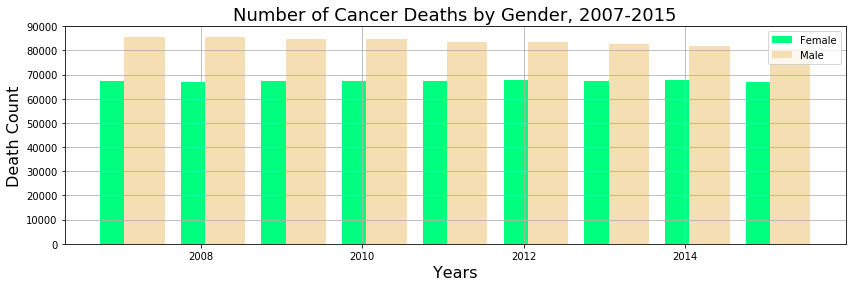

In [244]:
Group_Fe_Yr_Dth=GroupBy_by_Female_df.groupby(['Year'])['Deaths'].sum()
Group_Ma_Yr_Dth=GroupBy_by_Male_df.groupby(['Year'])['Deaths'].sum()

#New Dictionary w/ year and corresponding male/female counts


dict={'femaleCount':Group_Fe_Yr_Dth,
      'maleCount'  :Group_Ma_Yr_Dth}
           
Fe_Ma_df =pd.DataFrame(dict)
   

#Positioning
barWidth = .3
r1 = np.arange(2007,2016,1)
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize =(14,4))
ax = fig.add_subplot(111)
ax.bar(r1, Group_Fe_Yr_Dth,width=0.5,color='springgreen',align='center')
ax.bar(r2, Group_Ma_Yr_Dth,width=0.5,color='wheat',align='center')
plt.grid(True)
ax.set_xlabel('Years',fontsize = 16)
ax.set_ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Gender, 2007-2015',fontsize = 18)
plt.legend(('Female', 'Male'),loc='upper right')
plt.show()

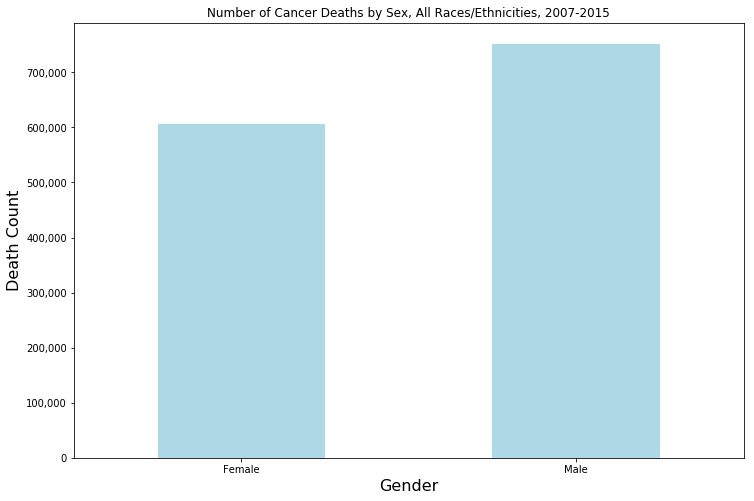

In [18]:
#Group data by Gender, All Races/Ethnicities
#The number of cases (or deaths) per 100,000 people

GroupBy_by_Age_df = lung_df_01.groupby('Sex')['Deaths'].sum()
plt.figure(figsize =(12,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Sex', y='Deaths', rot=0,facecolor='lightblue')
Death_Count_Group_By_Age.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.xlabel('Gender',fontsize = 16)
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Sex, All Races/Ethnicities, 2007-2015')
plt.grid(False)


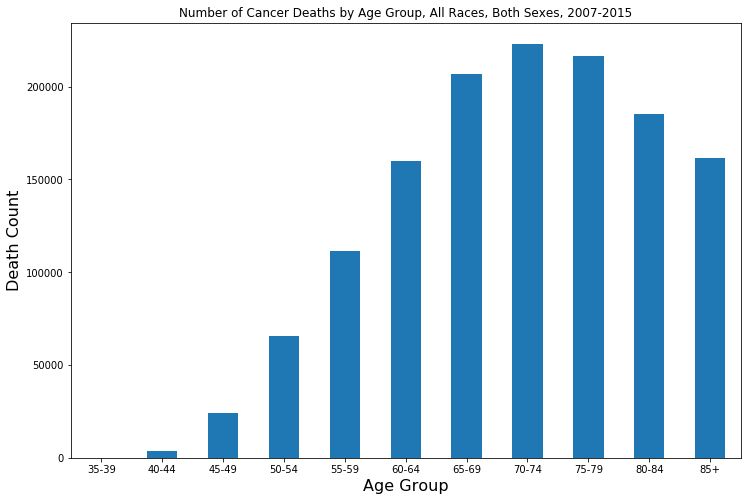

In [202]:

#Group data by Age
#The number of cases (or deaths) per 100,000 people

GroupBy_by_Age_df = lung_df_01.groupby('Age Group')['Deaths'].sum()
plt.figure(figsize =(12,8))
Death_Count_Group_By_Age =GroupBy_by_Age_df.plot.bar(x='Age Group', y='Deaths', rot=0)

plt.xlabel('Age Group',fontsize = 16)
plt.ylabel('Death Count',fontsize = 16)
plt.title('Number of Cancer Deaths by Age Group, All Races, Both Sexes, 2007-2015')
plt.grid(False)



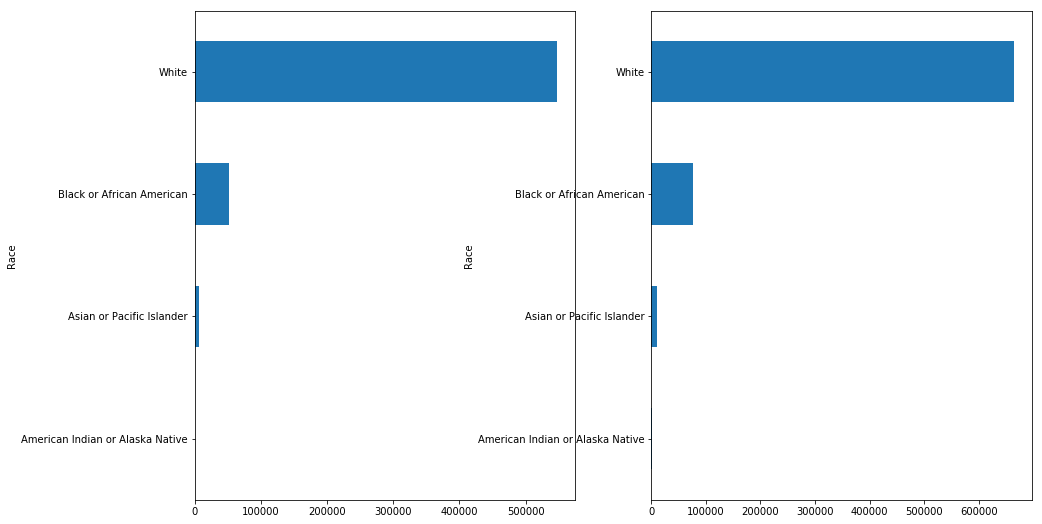

In [240]:
#Number of Cancer Deaths by Sex and Race/Ethnicity
GroupBy_by_Gender_df = lung_df_01.groupby('Sex')

GroupBy_by_Female_df = GroupBy_by_Gender_df.get_group('Female')
GroupBy_by_Male_df = GroupBy_by_Gender_df.get_group('Male') 

Group_Fe_Yr_Race=GroupBy_by_Female_df.groupby(['Race'])['Deaths'].sum()
Group_Ma_Yr_Race=GroupBy_by_Male_df.groupby(['Race'])['Deaths'].sum()





'''g=plt.figure(figsize =(15,9))
             
#ig = plt.figure()
# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)
Death_Count_FGender_Race=Group_Fe_Yr_Race.plot.bar(x='Race', y='Deaths', rot=0)

ax2 = fig.add_subplot(122)
Death_Count_MGender_Race=Group_Ma_Yr_Race.plot.barh(x='Race', y='Deaths', rot=0))


# Show graphic
plt.show()'''

fig, (ax1, ax2) = plt.subplots(2, 1)

